In [48]:
import matplotlib as mpl
import matplotlib.patheffects as path_effects

from mplsoccer import VerticalPitch, Sbopen

from variables import player_iden, player_nn, cur_team, comp_name, player_number, player_matches

In [49]:
parser = Sbopen()

In [50]:
match_id = 3837876

In [51]:
event, related, freeze, tactics = parser.event(match_id)
team2 = list(set(event.team_name.unique()) - {cur_team})[0]

In [52]:
starting_xi_event = event.loc[((event['type_name'] == 'Starting XI') &
                               (event['team_name'] == cur_team)), ['id', 'tactics_formation']]
# joining on the team name and formation to the lineup
starting_xi = tactics.merge(starting_xi_event, on='id')

In [53]:
#merge on the starting positions to the events
event = event.merge(starting_xi, on='player_id')
formation = event['tactics_formation_y'].iloc[0]

In [54]:
main_color = '#004170'
sec_color = '#DA291C'

C:\TEMP\ipykernel_5240\2261988060.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(x, y, s=f'{starting_xi_j_n.iloc[i][0]}: {starting_xi_j_n.iloc[i][1]} ({starting_xi_j_n.iloc[i][2]})', fontsize='large')


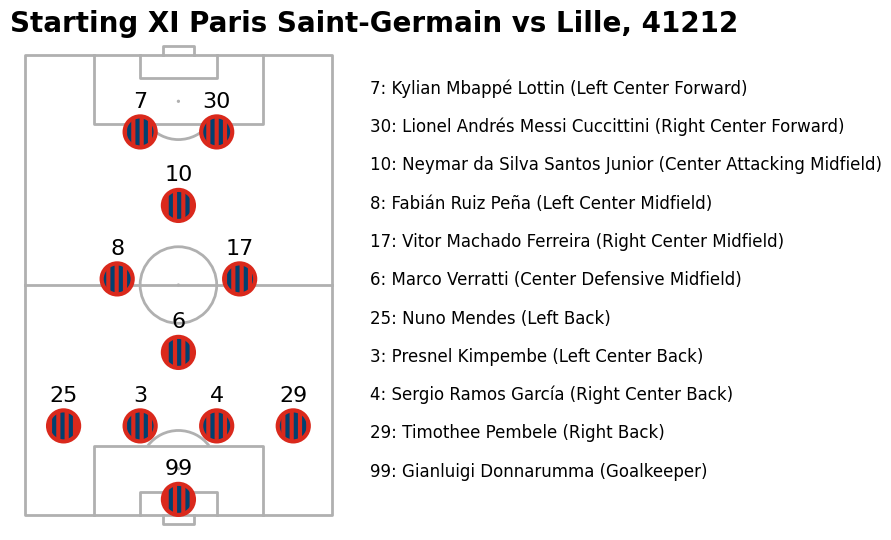

In [55]:
path_eff = [path_effects.Stroke(linewidth=3, foreground='white'),
            path_effects.Normal()]

pitch = VerticalPitch(goal_type='box')
fig, ax = pitch.draw(figsize=(9, 16))
ax_text = pitch.formation(formation, positions=starting_xi.position_id, kind='text',
                          text=starting_xi.jersey_number,
                          va='center', ha='center', fontsize=16, ax=ax)
# scatter markers
mpl.rcParams['hatch.linewidth'] = 3
mpl.rcParams['hatch.color'] = main_color
ax_scatter = pitch.formation(formation, positions=starting_xi.position_id, kind='scatter',
                             c=sec_color,
                             hatch='||', linewidth=3, s=500,
                             # you can also provide a single offset instead of a list
                             # for xoffset and yoffset
                             xoffset=-8,
                             ax=ax)

ax_title = ax.set_title(f'Starting XI {cur_team} vs {team2}, {formation}', fontsize=20, fontweight='bold', color='black', loc='left')

starting_xi_j_n = starting_xi[['jersey_number', 'player_name', 'position_name']]
x = 90
y = 110
starting_xi_j_n = starting_xi_j_n.iloc[::-1]
for i in range(len(starting_xi_j_n)):
  ax.text(x, y, s=f'{starting_xi_j_n.iloc[i][0]}: {starting_xi_j_n.iloc[i][1]} ({starting_xi_j_n.iloc[i][2]})', fontsize='large')
  y = y - 10